## Business Background and Problem Statement
A brand manager from a large consumer goods company wants to understand how pricing and promotional strategies influence market share dynamics for Brand X over time.

Business Objectives

The goal of this project is to analyze and predict the market share dynamics of Brand X using real-world retail scanner data.
Specifically, this project aims to:

• Identify key drivers influencing market share fluctuations
• Quantify the impact of pricing strategies on competitive performance
• Evaluate the effectiveness of different promotional activities
• Understand the behavioral differences between loyal and non-loyal customers
• Develop predictive models to forecast future market share trends

Data Overview

•Time period: 101 weeks
•Data type: Retail scanner data
•Variables description

Analytical Approach

Methodology:
•Exploratory Data Analysis
•Multiple Linear Regression
•Diagnostic Testing
•Outlier Detection
•Box-Cox Transformation

Key Insights

Market share is significantly influenced by non-loyal customers rather than loyal customers
Promotional activities have a strong short-term impact
Relative price shows expected negative elasticity
Model explains nearly 50% of share variation

In [ ]:
# Data Overview and Variable Description
import pandas as pd
df = pd.read_csv("market_share_data.csv")
df.head()

In [ ]:
# Exploratory Data Analysis
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.info()

Shape: (101, 7)
Columns: ['rel_price', 'lag_price', 'nonloy', 'loy', 'week', 'share', 'promo']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rel_price  101 non-null    int64 
 1   lag_price  101 non-null    int64 
 2   nonloy     101 non-null    int64 
 3   loy        101 non-null    int64 
 4   week       101 non-null    int64 
 5   share      101 non-null    int64 
 6   promo      101 non-null    object
dtypes: int64(6), object(1)
memory usage: 5.6+ KB


In [ ]:
# Baseline Regression Model
import statsmodels.formula.api as smf 

model = smf.ols("share ~ rel_price + lag_price", data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  share   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     17.19
Date:                Mon, 23 Feb 2026   Prob (F-statistic):           4.00e-07
Time:                        14:33:30   Log-Likelihood:                -329.25
No. Observations:                 101   AIC:                             664.5
Df Residuals:                      98   BIC:                             672.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     73.3656     17.356      4.227      0.000      38.924     107.808
rel_price     -0.6191      0.112     -5.542      0.000      -0.841      -0.397
lag_price      0.1828      0.112      1.633      0.106      -0.039       0.405
==============================================================================
Omnibus:                       15.322   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.952
Skew:                           0.841   Prob(JB):                     0.000126
Kurtosis:                       4.197   Cond. No.                     4.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

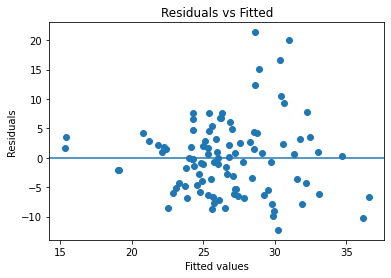

In [ ]:
# Model Diagnostics and Assumption Checking
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Residual vs Fitted Plot
fitted = model.fittedvalues
resid = model.resid

plt.figure(figsize=(6,4))
plt.scatter(fitted, resid)
plt.axhline(0)            
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

The residuals are randomly scattered around zero, suggesting that the linearity assumption is reasonably satisfied and there is no strong evidence of model bias. However, the spread of residuals increases slightly at higher fitted values, indicating mild heteroscedasticity.

In [ ]:
#check if all the value of share > 0
df["share"].describe()

count    101.000000
mean      26.693069
std        7.361715
min       14.000000
25%       22.000000
50%       25.000000
75%       31.000000
max       51.000000
Name: share, dtype: float64

In [ ]:
# Model Improvement via Transformation
# Box-Cox Transformation
import numpy as np
from scipy import stats

y = df["share"].astype(float) 
y_bc, lam = stats.boxcox(y)

print("Best lambda =", lam)
print("Shift used =", shift)

df["share_bc"] = y_bc

Best lambda = -0.40477124364947126
Shift used = 0.0


In [ ]:
# Fit regression model using transformend y(share_bc)
import statsmodels.formula.api as smf

model_bc = smf.ols("share_bc ~ rel_price + lag_price", data=df).fit()
model_bc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               share_bc   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     19.72
Date:                Mon, 23 Feb 2026   Prob (F-statistic):           6.35e-08
Time:                        15:48:01   Log-Likelihood:                 143.04
No. Observations:                 101   AIC:                            -280.1
Df Residuals:                      98   BIC:                            -272.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2543      0.162     13.944      0.000       1.933       2.575
rel_price     -0.0061      0.001     -5.901      0.000      -0.008      -0.004
lag_price      0.0019      0.001      1.850      0.067      -0.000       0.004
==============================================================================
Omnibus:                        1.338   Durbin-Watson:                   1.797
Prob(Omnibus):                  0.512   Jarque-Bera (JB):                1.218
Skew:                          -0.115   Prob(JB):                        0.544
Kurtosis:                       2.514   Cond. No.                     4.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

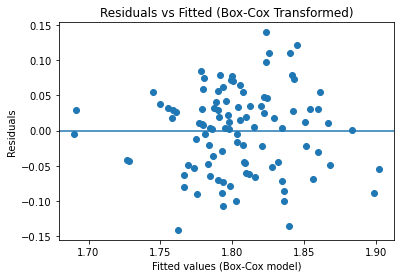

In [ ]:
# Model Diagnostics and Assumption Checking
import matplotlib.pyplot as plt

fitted_bc = model_bc.fittedvalues
resid_bc = model_bc.resid

plt.figure(figsize=(6,4))
plt.scatter(fitted_bc, resid_bc)
plt.axhline(0)
plt.xlabel("Fitted values (Box-Cox model)")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted (Box-Cox Transformed)")
plt.show()

The residuals vs fitted plot after Box-Cox transformation shows a more uniform spread of residuals around zero. The previously observed mild heteroscedasticity has been substantially reduced, indicating that the variance-stabilizing transformation successfully improved model assumptions.

In [ ]:
# Influence Analysis
influence = model_bc.get_influence()

leverage = influence.hat_matrix_diag  
cooks = influence.cooks_distance[0]   
dffits = influence.dffits[0]         

df["leverage"] = leverage
df["cooks"] = cooks
df["dffits"] = dffits

In [ ]:
# Set threshold
n = len(df)
p = model_bc.df_model + 1

lev_threshold = 2 * p / n
lev_threshold

cook_threshold = 4 / n
cook_threshold

# Identify influential points
influential_points = df[
    (df["cooks"] > cook_threshold) |
    (df["leverage"] > lev_threshold)
]

influential_points

,rel_price,lag_price,nonloy,loy,week,share,promo,share_bc,leverage,cooks,dffits
20,124,103,21,44,76,19,no,1.720313,0.100973,0.009686,0.169817
21,103,124,33,61,77,40,promo2,1.915493,0.100898,0.034730,0.322667
26,94,115,21,53,82,26,promo2,1.809762,0.077631,0.068096,-0.455345
27,107,94,35,50,83,32,promo1,1.863028,0.061899,0.047051,0.377931
35,94,107,31,59,91,35,promo2,1.884668,0.061347,0.000009,0.005119
36,99,94,22,51,92,23,promo2,1.776143,0.084542,0.025182,-0.274600
43,98,100,35,58,99,51,promo2,1.967477,0.051603,0.080179,0.499329
44,95,98,22,52,100,36,promo1,1.891311,0.082002,0.008951,0.163281
45,105,95,36,67,101,18,promo2,1.703714,0.056166,0.046961,-0.378018
47,114,108,23,56,103,14,promo2,1.621604,0.025375,0.049849,-0.396529


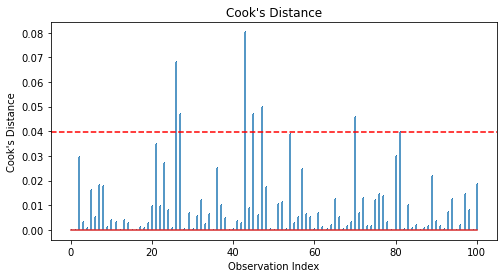

In [ ]:
# Visualize Cook's Distance
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.stem(df.index.values, df["cooks"].values, markerfmt=",")
plt.axhline(cook_threshold, color="red", linestyle="--")
plt.title("Cook's Distance")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.show()

Influence diagnostics using Cook’s distance identified several observations with relatively high influence on the regression model. These points may correspond to unusual market conditions such as extreme pricing or promotional activities.

In [ ]:
# Business Insight
high_influence = df[df["cooks"] > cook_threshold]

high_influence[["week", "share", "rel_price", "promo", "cooks"]]

,week,share,rel_price,promo,cooks
26,82,26,94,promo2,0.068096
27,83,32,107,promo1,0.047051
43,99,51,98,promo2,0.080179
45,101,18,105,promo2,0.046961
47,103,14,114,promo2,0.049849
70,126,18,103,no,0.045606


Influence analysis revealed that observations with newspaper coupon promotions (promo2) exhibited the highest impact on the regression model, indicating that this promotion type significantly disrupts the normal price–market share relationship.

In [ ]:
# Interaction Effect
# rel_price*C(promo)=rel_price + promo + rel_price:promo
model_promo = smf.ols(
    "share ~ rel_price*C(promo) + lag_price*C(promo)",
    data=df
).fit()

model_promo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  share   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     6.971
Date:                Tue, 24 Feb 2026   Prob (F-statistic):           3.76e-07
Time:                        08:29:40   Log-Likelihood:                -320.50
No. Observations:                 101   AIC:                             659.0
Df Residuals:                      92   BIC:                             682.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       79.3554     39.969      1.985      0.050      -0.026     158.737
C(promo)[T.promo1]              -4.5942     50.451     -0.091      0.928    -104.793      95.605
C(promo)[T.promo2]             -41.9746     48.805     -0.860      0.392    -138.906      54.956
rel_price                       -0.3204      0.194     -1.654      0.101      -0.705       0.064
rel_price:C(promo)[T.promo1]    -0.2911      0.321     -0.906      0.367      -0.929       0.347
rel_price:C(promo)[T.promo2]    -0.2602      0.255     -1.021      0.310      -0.766       0.246
lag_price                       -0.1937      0.289     -0.671      0.504      -0.767       0.379
lag_price:C(promo)[T.promo1]     0.3550      0.331      1.073      0.286      -0.302       1.012
lag_price:C(promo)[T.promo2]     0.6978      0.337      2.074      0.041       0.029       1.366
==============================================================================
Omnibus:                       10.566   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               13.380
Skew:                           0.542   Prob(JB):                      0.00124
Kurtosis:                       4.416   Cond. No.                     2.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Although individual promotion coefficients are not statistically significant at the 5% level, the overall F-test comparing models with and without promotion variables indicates that the promotion variable group significantly improves model fit. This suggests that promotional activities collectively play an important role in explaining market share variation.

In [ ]:
# Time Trend Model
df["week_c"] = df["week"] - df["week"].mean() #center the variable “week”

df["week_c2"] = df["week_c"]**2
df["week_c3"] = df["week_c"]**3

# Fit polynomial regression model
import statsmodels.formula.api as smf

model_time = smf.ols(
    "share ~ week_c + week_c2 + week_c3",
    data=df
).fit()

model_time.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  share   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     2.228
Date:                Mon, 23 Feb 2026   Prob (F-statistic):             0.0897
Time:                        23:44:44   Log-Likelihood:                -341.07
No. Observations:                 101   AIC:                             690.1
Df Residuals:                      97   BIC:                             700.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.9055      1.079     24.005      0.000      23.764      28.047
week_c        -0.0297      0.062     -0.481      0.632      -0.152       0.093
week_c2        0.0009      0.001      0.979      0.330      -0.001       0.003
week_c3    -1.835e-05    3.7e-05     -0.496      0.621   -9.17e-05     5.5e-05
==============================================================================
Omnibus:                       16.975   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.106
Skew:                           0.928   Prob(JB):                     4.31e-05
Kurtosis:                       4.155   Cond. No.                     7.30e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model_loy = smf.ols(
    "share ~ rel_price*C(promo) + lag_price*C(promo) + loy + nonloy",
    data=df
).fit()

model_loy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  share   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     8.202
Date:                Tue, 24 Feb 2026   Prob (F-statistic):           2.64e-09
Time:                        08:36:15   Log-Likelihood:                -311.72
No. Observations:                 101   AIC:                             645.4
Df Residuals:                      90   BIC:                             674.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       60.9198     37.396      1.629      0.107     -13.373     135.213
C(promo)[T.promo1]              10.4441     46.981      0.222      0.825     -82.892     103.780
C(promo)[T.promo2]             -29.6397     45.357     -0.653      0.515    -119.749      60.470
rel_price                       -0.2587      0.180     -1.435      0.155      -0.617       0.099
rel_price:C(promo)[T.promo1]    -0.3789      0.310     -1.223      0.224      -0.994       0.237
rel_price:C(promo)[T.promo2]    -0.2792      0.236     -1.181      0.241      -0.749       0.190
lag_price                       -0.1771      0.268     -0.662      0.510      -0.709       0.354
lag_price:C(promo)[T.promo1]     0.2941      0.313      0.940      0.350      -0.327       0.915
lag_price:C(promo)[T.promo2]     0.5854      0.313      1.869      0.065      -0.037       1.208
loy                             -0.0086      0.012     -0.701      0.485      -0.033       0.016
nonloy                           0.4396      0.109      4.044      0.000       0.224       0.656
==============================================================================
Omnibus:                        4.012   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.135   Jarque-Bera (JB):                3.785
Skew:                           0.262   Prob(JB):                        0.151
Kurtosis:                       3.791   Cond. No.                     2.25e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The inclusion of loyalty variables significantly improved the model fit, increasing R² from around 0.37 to 0.48.
The overall model is highly significant (p < 0.001).
Among all predictors, only non-loyal shopping trips is statistically significant.

This indicates that changes in market share are mainly driven by non-loyal customers rather than loyal customers.

The results suggest that:
• Price and promotion have limited direct effects
• Market share is primarily influenced by attracting non-loyal consumers

In [ ]:
# Market Share Forecasting

# Time-based train-test split
train = df.iloc[:-5]

test = df.iloc[-5:]

print("Train size:", len(train))
print("Test size:", len(test))

Train size: 96
Test size: 5


In [ ]:
# Fit the final prediction model using the train set
import statsmodels.formula.api as smf

final_model = smf.ols(
    "share ~ rel_price*C(promo) + lag_price*C(promo) + loy + nonloy",
    data=train
).fit()

final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  share   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     8.980
Date:                Tue, 24 Feb 2026   Prob (F-statistic):           6.39e-10
Time:                        08:55:04   Log-Likelihood:                -294.57
No. Observations:                  96   AIC:                             611.1
Df Residuals:                      85   BIC:                             639.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       59.6698     37.323      1.599      0.114     -14.538     133.878
C(promo)[T.promo1]              14.8001     46.791      0.316      0.753     -78.233     107.833
C(promo)[T.promo2]             -33.9579     45.179     -0.752      0.454    -123.787      55.871
rel_price                       -0.2326      0.187     -1.247      0.216      -0.604       0.138
rel_price:C(promo)[T.promo1]    -0.4402      0.312     -1.411      0.162      -1.060       0.180
rel_price:C(promo)[T.promo2]    -0.3061      0.239     -1.280      0.204      -0.782       0.169
lag_price                       -0.2010      0.267     -0.753      0.453      -0.731       0.329
lag_price:C(promo)[T.promo1]     0.3141      0.311      1.012      0.315      -0.303       0.932
lag_price:C(promo)[T.promo2]     0.6567      0.313      2.096      0.039       0.034       1.280
loy                             -0.0091      0.012     -0.751      0.455      -0.033       0.015
nonloy                           0.4763      0.116      4.112      0.000       0.246       0.707
==============================================================================
Omnibus:                        3.732   Durbin-Watson:                   1.784
Prob(Omnibus):                  0.155   Jarque-Bera (JB):                3.161
Skew:                           0.310   Prob(JB):                        0.206
Kurtosis:                       3.636   Cond. No.                     2.23e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Forecast market share for the next 5 weeks

test["predicted_share"] = final_model.predict(test)
test[["week", "share", "predicted_share"]]

C:\Users\0105Chen\AppData\Local\Temp\ipykernel_24060\2447720780.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["predicted_share"] = final_model.predict(test)


,week,share,predicted_share
96,152,26,24.492251
97,153,24,20.634924
98,154,30,28.982294
99,155,24,17.223335
100,156,20,33.804598


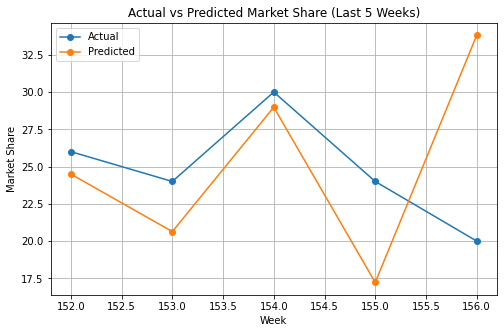

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

plt.plot(test["week"].values, test["share"].values, marker="o", label="Actual")
plt.plot(test["week"].values, test["predicted_share"].values, marker="o", label="Predicted")

plt.xlabel("Week")
plt.ylabel("Market Share")
plt.title("Actual vs Predicted Market Share (Last 5 Weeks)")
plt.legend()
plt.grid(True)

plt.show()

The model captures general trends but struggles with short-term volatility due to limited sample size and missing external market factors such as competitor promotions and seasonality.